In [2]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

from matplotlib.pyplot import title
from scipy.ndimage import label
from scipy.stats import alpha

In [3]:
# Importing all the yearly crime data into an array for storage (25-28 seconds)
years = []
for i in range(2017, 2026, 1):
    years.append(i)

print(years)

crime_by_year = []
for year in years:
    filepath = os.path.join("..", "..", "Data", "Crime", f"Crime_Incidents_in_{year}.geojson")

    filepath = os.path.abspath(filepath)
    crime_by_year.append(gpd.read_file(filepath))


[2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [4]:
# Categorizing crime

#crime25.head()
#print(crime25['OFFENSE'].unique())

violent_crime = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']
property_crime = ['THEFT/OTHER', 'THEFT F/AUTO', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ARSON']
non_car_property_crime = ['THEFT/OTHER', 'BURGLARY', 'ARSON'] # removed car related
car_related_crime = ['MOTOR VEHICLE THEFT', 'THEFT F/AUTO']

In [5]:
# One-hot encode a column for violent_crime, property_crime and car_related_crime
for data in crime_by_year:
    # Violent Crime
    data['violent_crime'] = data['OFFENSE'].isin(violent_crime).astype(int)
    # Property Crime
    data['property_crime'] = data['OFFENSE'].isin(property_crime).astype(int)
    # Car Related Crime
    data['car_related_crime'] = data['OFFENSE'].isin(car_related_crime).astype(int)
    # Non-car Property Crime
    data['non_car_property_crime'] = data['OFFENSE'].isin(non_car_property_crime).astype(int)
#crime_by_year[0].head()

In [6]:
# Collect crime count data by year into a df
counts_violent_crime = []
counts_property_crime = []
counts_car_related_crime = []
counts_non_car_property_crime = []

for data in crime_by_year:
    counts_violent_crime.append(data['violent_crime'].sum())
    counts_property_crime.append(data['property_crime'].sum())
    counts_car_related_crime.append(data['car_related_crime'].sum())
    counts_non_car_property_crime.append(data['non_car_property_crime'].sum())

d = {'year': years,
     'violent_crime': counts_violent_crime,
     'property_crime': counts_property_crime,
     'car_related_crime': counts_car_related_crime,
     'non_car_property_crime': counts_non_car_property_crime}
agg_crime_data = pd.DataFrame(d)

In [5]:
#agg_crime_data
# use index = False
#agg_crime_data.to_csv('../../Data/Crime/agg_crime_year.csv', index = False)
agg_crime_data = pd.read_csv('../../Data/Crime/agg_crime_year.csv')
agg_crime_data.head()

,year,violent_crime,property_crime,car_related_crime,non_car_property_crime
0,2017,4432,28662,12663,15999
1,2018,4140,29706,14045,15661
2,2019,4176,29793,12933,16860
3,2020,4005,23926,11543,12383
4,2021,4113,24208,12141,12067


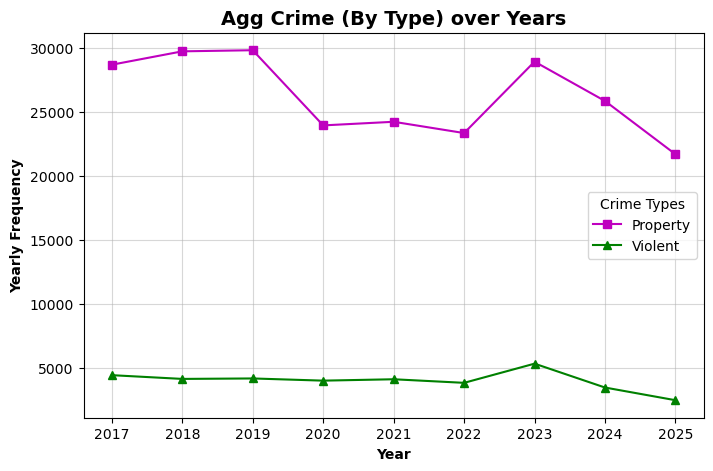

In [18]:
# Line graph for violent_crime, property_crime and car_related_crime counts over years
plt.figure(figsize = (8,5))
x = agg_crime_data['year']
plt.plot(x, agg_crime_data['property_crime'], 'ms-', label='Property')
plt.plot(x, agg_crime_data['violent_crime'], 'g^-', label='Violent')
plt.legend(title='Crime Types')
plt.xlabel('Year', fontsize = 10, fontweight = 'bold')
plt.ylabel('Yearly Frequency', fontsize = 10, fontweight = 'bold')
plt.title('Agg Crime (By Type) over Years', fontsize = 14, fontweight = 'bold')
plt.grid(True, alpha = 0.5)
plt.show()

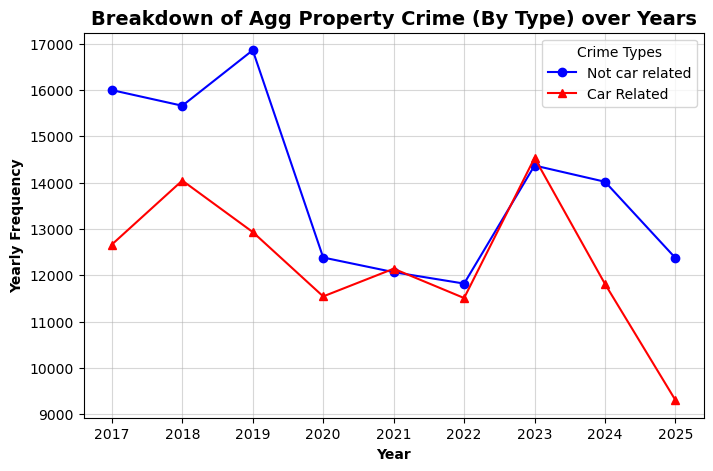

In [19]:
# Line graph separation of property crimes
plt.figure(figsize = (8,5))
x = agg_crime_data['year']
plt.plot(x, agg_crime_data['non_car_property_crime'], 'bo-', label='Not car related')
plt.plot(x, agg_crime_data['car_related_crime'], 'r^-', label='Car Related')
#plt.plot(x, agg_crime_data['property_crime'], 'm^-', label='Car related')
plt.legend(title='Crime Types')
plt.xlabel('Year', fontsize = 10, fontweight = 'bold')
plt.ylabel('Yearly Frequency', fontsize = 10, fontweight = 'bold')
plt.title('Breakdown of Agg Property Crime (By Type) over Years', fontsize = 14, fontweight = 'bold')
plt.grid(True, alpha = 0.5)
plt.show()

In [10]:
filepath = os.path.join("..", "..", "Data", "Crime", f"Crime_Incidents_in_2021.geojson")

#test = gpd.read_file(filepath)


filtered = test[test["START_DATE"].dt.date == pd.to_datetime("2021-01-06").date()]

filtered

,CCN,REPORT_DAT,START_DATE,END_DATE,BLOCK,OFFENSE,METHOD,SHIFT,WARD,ANC,...,CENSUS_TRACT,VOTING_PRECINCT,BID,XBLOCK,YBLOCK,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID,geometry
11,21002362,2021-01-06 09:16:37+00:00,2021-01-06 07:43:46+00:00,NaT,2632 - 2663 BLOCK OF MARTIN LUTHER KING JR AVE...,ASSAULT W/DANGEROUS WEAPON,KNIFE,MIDNIGHT,8,8C,...,007401,Precinct 119,ANACOSTIA,400366.0,132181.0,38.857442,-76.995783,883508272,None,POINT (-76.99579 38.85745)
12,21002692,2021-01-07 01:41:08+00:00,2021-01-06 22:42:56+00:00,2021-01-06 23:55:02+00:00,200 - 499 BLOCK OF ANACOSTIA ROAD SE,ROBBERY,GUN,EVENING,7,7F,...,007703,Precinct 107,None,403949.0,135293.0,38.885467,-76.954484,883508273,None,POINT (-76.95449 38.88547)
121,21002310,2021-01-06 06:33:51+00:00,2021-01-06 02:55:08+00:00,2021-01-06 04:54:32+00:00,812 - 899 BLOCK OF BLADENSBURG ROAD NE,SEX ABUSE,OTHERS,MIDNIGHT,5,5D,...,008903,Precinct 79,None,401508.0,137047.0,38.901275,-76.982615,883509674,None,POINT (-76.98262 38.90128)
122,21002456,2021-01-06 15:54:27+00:00,2021-01-06 14:59:44+00:00,2021-01-06 15:54:37+00:00,1 - 99 BLOCK OF M STREET NE,THEFT/OTHER,OTHERS,DAY,6,6E,...,010603,Precinct 144,NOMA,399351.0,137531.0,38.905636,-77.007482,883509675,None,POINT (-77.00748 38.90564)
123,21003013,2021-01-07 18:09:52+00:00,2021-01-06 22:30:28+00:00,2021-01-07 17:13:21+00:00,600 - 629 BLOCK OF RHODE ISLAND AVENUE NW,THEFT/OTHER,OTHERS,DAY,2,2G,...,004801,Precinct 21,None,398225.0,138331.0,38.912841,-77.020466,883509676,None,POINT (-77.02047 38.91285)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27377,21002525,2021-01-06 17:45:37+00:00,2021-01-06 17:00:17+00:00,2021-01-06 17:25:48+00:00,1200 - 1229 BLOCK OF 1ST STREET NE,THEFT/OTHER,OTHERS,DAY,6,6E,...,010601,Precinct 144,NOMA,399489.0,137576.0,38.906042,-77.005891,884048361,None,POINT (-77.00589 38.90605)
27382,21002737,2021-01-07 03:35:08+00:00,2021-01-06 23:50:49+00:00,NaT,1600 - 1699 BLOCK OF EASTERN AVENUE NE,ASSAULT W/DANGEROUS WEAPON,GUN,EVENING,7,7C,...,009601,Precinct 92,None,405780.0,138199.0,38.911635,-76.933356,884048375,None,POINT (-76.93336 38.91164)
27587,21002649,2021-01-06 22:46:50+00:00,2021-01-06 05:00:49+00:00,2021-01-06 15:00:51+00:00,2900 - 2918 BLOCK OF GEORGIA AVENUE NW,THEFT F/AUTO,OTHERS,EVENING,1,1E,...,003100,Precinct 37,None,398006.0,139949.0,38.927416,-77.022996,884052703,None,POINT (-77.023 38.92742)
27588,21002941,2021-01-07 14:23:34+00:00,2021-01-06 17:50:54+00:00,2021-01-06 17:55:59+00:00,1 - 17 BLOCK OF DANBURY STREET SW,THEFT/OTHER,OTHERS,DAY,8,8D,...,009807,Precinct 126,None,399288.0,128889.0,38.827786,-77.008200,884052704,None,POINT (-77.0082 38.82779)
